In [10]:
pip install tensorflow matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


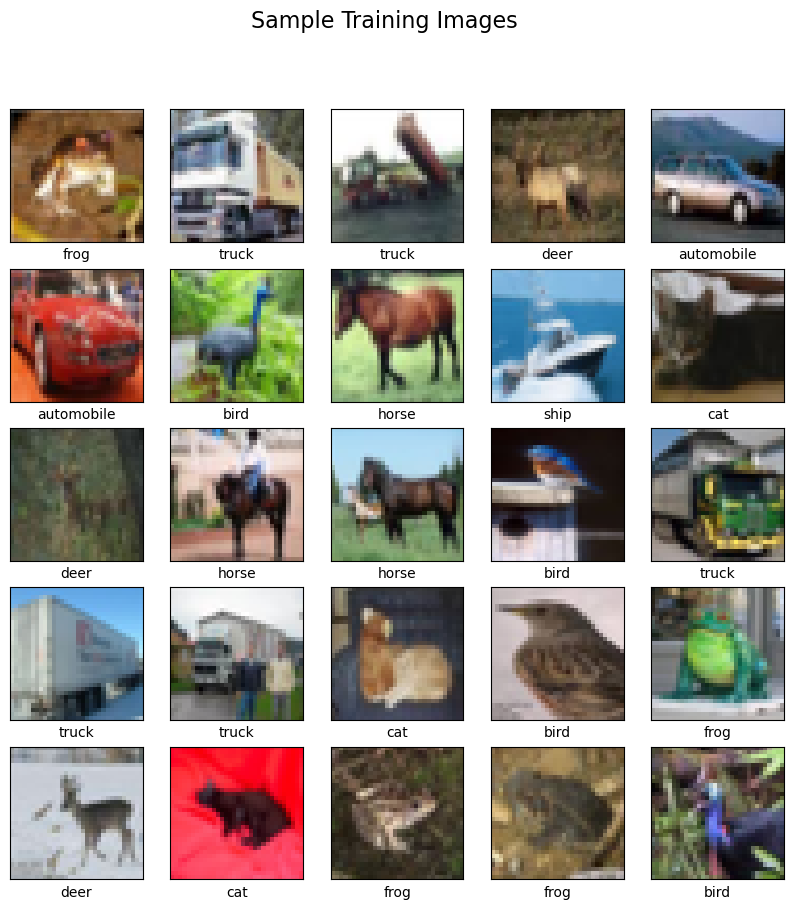

C:\Users\lohit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.3380 - loss: 1.7755 - val_accuracy: 0.5360 - val_loss: 1.2823
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.5616 - loss: 1.2330 - val_accuracy: 0.6040 - val_loss: 1.1067
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6180 - loss: 1.0801 - val_accuracy: 0.6030 - val_loss: 1.1192
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6617 - loss: 0.9636 - val_accuracy: 0.6620 - val_loss: 0.9645
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 303s 194ms/step - accuracy: 0.6920 - loss: 0.8840 - val_accuracy: 0.6790 - val_loss: 0.9097
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7121 - loss: 0.8266 - val_accuracy: 0.6859 - val_loss: 0.8954
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7292 - loss: 0.7755 - val_accuracy: 0.6901 - val_loss: 0.9064
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.7425

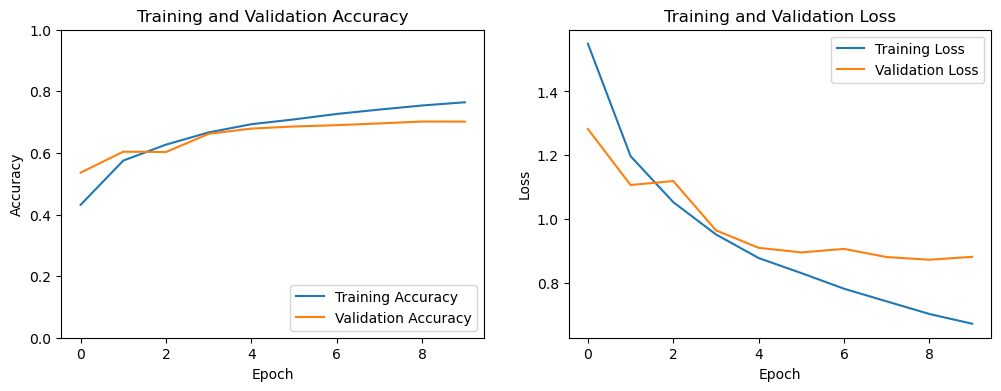

313/313 - 3s - 9ms/step - accuracy: 0.7016 - loss: 0.8816

Test accuracy: 70.16%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


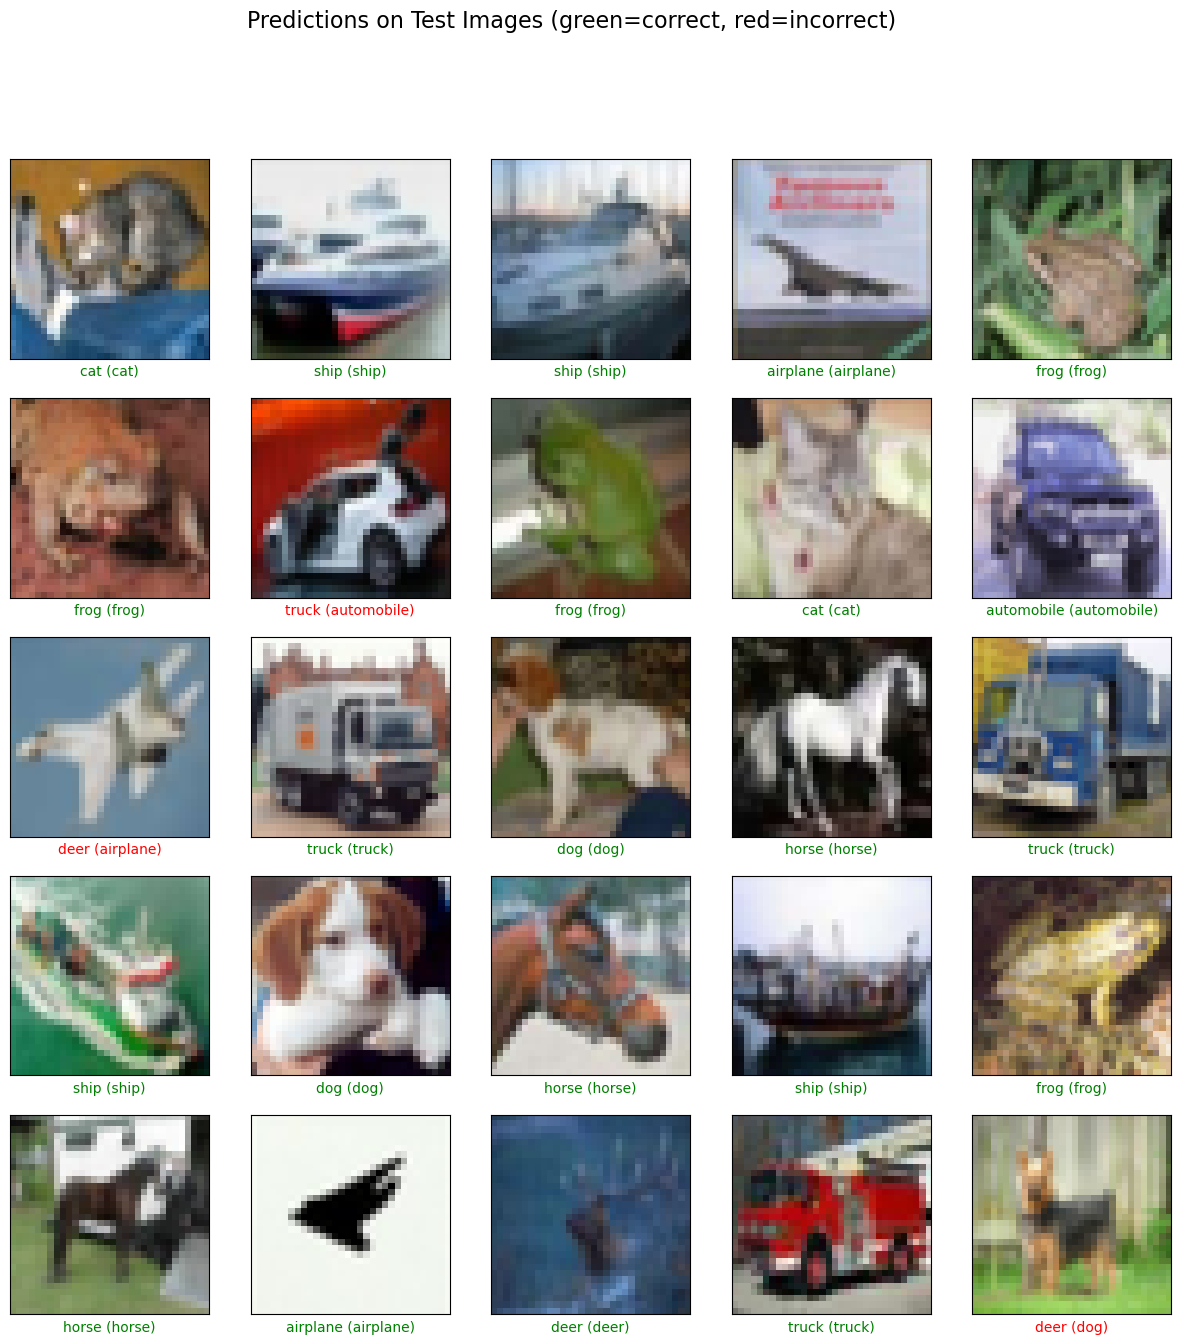

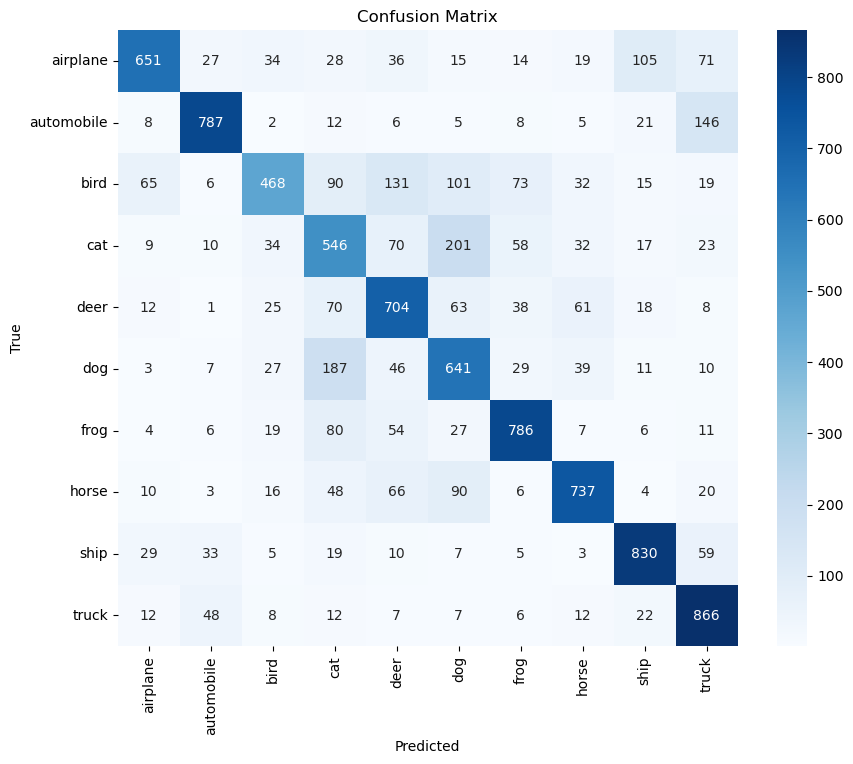

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle('Sample Training Images', fontsize=16)
plt.show()


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")


probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(test_images)


plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.suptitle('Predictions on Test Images (green=correct, red=incorrect)', fontsize=16)
plt.show()


predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()